# Aula Interativa 1

Data: 09/03/2021

Professor: Erick Faria

GitHub: https://github.com/erickfaria

Fonte: Códigos adaptados de codigoquant  
Para conhecer mais, visite: https://github.com/codigoquant

# **Exemplo de aplicação do Python para Análise Financeira**

# Exemplo 1 - Criando um Ranking de Ações

## Parte 1 - Importação e Instalação dos pacotes e módulos

In [ ]:
# Importação dos pacotes

import numpy as np # Pacote indicado para trabalhar com números
import pandas as pd # Pacote indicado para lidar com Data Frames
import seaborn as sns # Pacote indicado para representações gráficas
import matplotlib.pyplot as plt # Pacote indicado para representações gráficas
import pandas_datareader.data as web # Função para ler dados na web
import requests # Pacote para fazer requisições a sites

from google.colab import files

import warnings # Módulo para ignorar erros
warnings.filterwarnings('ignore')

!pip install yfinance --upgrade --no-cache-dir # Instala o pacote yfinance
import yfinance as yf # Módulo para ler as cotações
yf.pdr_override() # Sobrescreve pelo método yfinance

## Parte 2 - Leitura dos dados



In [10]:
url = 'https://www.fundamentus.com.br/resultado.php' # Variável com a url

header = {
  "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.89 Safari/537.36"  
 }

r = requests.get(url, headers=header) # Lê os arquivos do site fundamentus

## Parte 3 - Criação, Limpeza e Padronização dos dados (DataFrame)

**Após ler os dados, vamos criar o DataFrame com as informações**

In [11]:
# Cria o DF
df = pd.read_html(r.text,  decimal=',', thousands='.')[0]

# Define o DF com os stickers das Ações que vou analisar
carteira = df[df['Papel'].isin(['TAEE11', 'NEOE3', 'CMIG4', 'CPFE3', 'KLBN11', 'BBAS3'])]

In [ ]:
carteira

**Agora vamos fazer algumas substituições para manipular os dados em Python.**   
**Vamos substituir as vírgulas por pontos, retirar o sinal de % e remover alguns pontos**

In [13]:
# As substituições serão nas colunas ('Div.Yield', 'Mrg Ebit', 'Mrg. Líq.', 'ROIC', 'ROE', 'Cresc. Rec.5a')

for coluna in ['Div.Yield', 'Mrg Ebit', 'Mrg. Líq.', 'ROIC', 'ROE', 'Cresc. Rec.5a']:
  carteira[coluna] = carteira[coluna].str.replace('.', '')
  carteira[coluna] = carteira[coluna].str.replace(',', '.')
  carteira[coluna] = carteira[coluna].str.rstrip('%').astype('float') / 100

In [ ]:
carteira

**Agora vamos criar um ranking em nossa Carteira de ações.**
**No exemplo a seguir vamos utilizar a função sort.**
**As colunas utilizadas serão EV/EBIT e ROIC.**
**Posteriormente você pode modificar e utilizar outras colunas.**

In [16]:
ranking = pd.DataFrame() # Cria o DF chamado ranking
ranking['pos'] = range(1,6) # Cria uma coluna que vai dar a posição no Ranking
ranking['EV/EBIT'] = carteira[carteira['EV/EBIT'] > 0 ].sort_values(by=['EV/EBIT'])['Papel'][:5].values
ranking['ROIC'] = carteira.sort_values(by=['ROIC'], ascending=False)['Papel'][:5].values

In [ ]:
ranking

# Exemplo 2 - Representação Gráfica da Carteira de Ações

## Parte 1 - Importa os Dadsos

**Nesse exemplo, vamos usar os dados do Yahoo Finance**

In [ ]:
# Faz a leitura dos dados do Ibovespa e define o período que desejamos.

ibov = web.get_data_yahoo('^BVSP', start='2011-03-09', end='2021-03-09')

In [ ]:
#Imprime as 5 primeiras linhas

ibov.head()

In [ ]:
# Imprime as 5 últimas linhas

ibov.tail()

## Parte 2 - Faz a plotagem (gera os gráficos)

### Gráfico 1



In [ ]:
ibov["Close"].plot(figsize=(22,8), label="IBOV") # Linha IBOV
ibov["Close"].rolling(21).mean().plot(label="MM21") # Linha Média Móvel 21 Dias
ibov["Close"].rolling(200).mean().plot(label="MM200") # Linha Média Móvel 200 Dias
plt.legend(); # Plota as Legendas

### Gráfico 2

**Agora vamos mudar o eixo x do gráfico.**
**Nesse exemplo vamos analisar o IBOV no ano de 2020**

In [ ]:
ibov_fatiado = ibov[ibov.index.year == 2020] # Aqui definimos o ano de 2020
ibov_fatiado["Close"].plot(figsize=(22,8), label="IBOV")
ibov_fatiado["Close"].rolling(21).mean().plot(label="MM21") # Linha Média Móvel 21 Dias
ibov_fatiado["Close"].rolling(200).mean().plot(label="MM200") # Linha Média Móvel 200 Dias
plt.legend(); # Plota as Legendas

### Gráfico 3

**Agora vamos analizar entre dois períodos**

In [ ]:
ibov_fatiado = ibov[(ibov.index.year >= 2011) & (ibov.index.year <= 2021)]
ibov_fatiado["Close"].plot(figsize=(22,8), label="IBOV")
ibov_fatiado["Close"].rolling(21).mean().plot(label="MM21") # Linha Média Móvel 21 Dias
ibov_fatiado["Close"].rolling(200).mean().plot(label="MM200") # Linha Média Móvel 200 Dias
plt.legend(); # Plota as Legendas

**Lendo os valores que geraram os Gráficos**

In [ ]:
# Todos os dados referente ao mês 12 (Dezembro)

ibov_fatiado = ibov[ibov.index.month == 12]
ibov_fatiado.tail(50)

In [ ]:
# Todos os dados referente ao dia 14 de cada mês

ibov_fatiado = ibov[ibov.index.day == 14]
ibov_fatiado.tail(50)

# Exemplo 3 - Simulando uma carteira de Ações em comparação ao Ibov

## Parte 1 - Importação dos dados

In [ ]:
# Definindo os papeis que queremos analisar
tickers = "ABEV3.SA ITSA4.SA WEGE3.SA OIBR3.SA VALE3.SA"

carteira = yf.download(tickers, period='5y')["Adj Close"]

ibov = yf.download('^BVSP', period='5y')['Adj Close']

## Parte 2 - Limpeza dos dados

In [ ]:
# Aqui vamos fazer as exclusão dos valores NaN (Missing)da carteira
carteira.dropna(inplace=True)
carteira

In [ ]:
# Aqui vamos fazer as exclusão dos valores NaN (Missing)do IBOV
ibov.dropna(inplace=True)
ibov

## Parte 3 - Representação Gráfica

In [ ]:
# Vamos fazer a plotagem do Gráfico
sns.set()
carteira.plot(figsize=(22,8));

## Parte 4 - Tratamento dos dados e Representação Gráfica

Agora vamos utilizar um método muito comum no mercado financeiro que é normalizar a carteira. Alguns analistas utilizam esse método para tirar distorções dos papeis e permitir a comparação entre eles.

In [51]:
carteira_normalizada = (carteira / carteira.iloc[0])*10000 # Faz a normalização da Carteira
carteira_normalizada.dropna(inplace=True) # Apaga os missing

In [ ]:
# Gera o gráfico da Carteira Normalizada
carteira_normalizada.plot(figsize=(22,8));

In [53]:
# Cria a Coluna Saldo da Carteira Normalizada
carteira_normalizada["saldo"] = carteira_normalizada.sum(axis=1)

In [ ]:
carteira_normalizada

In [ ]:
# Faz o método de normalizar com o IBOV
ibov_normalizado = (ibov / ibov.iloc[0])*50000
ibov_normalizado

In [ ]:
# Gera um gráfico comparativo entre a carteira e o IBOV normalizados
carteira_normalizada["saldo"].plot(figsize=(22,8), label="Carteira de Ações")
ibov_normalizado.plot(label="IBOV")
plt.legend();

In [ ]:
# Utiliza a função describe para gerar os valores de estatística descritiva
carteira_normalizada.describe()

# Exemplo 4 - Correlação entre Dólar e o Ibovespa

## Parte 1 - Faz a importação dos dados

In [63]:
# Cria a Carteira e importa os dados.
tickers = "^BVSP USDBRL=X"
carteira = yf.download(tickers, start="2011-01-01")["Close"] # Define a data de início

[*********************100%***********************]  2 of 2 completed


In [64]:
carteira

,USDBRL=X,^BVSP
Date,,
2011-01-03,1.6155,69962.00000
2011-01-04,1.6465,70318.00000
2011-01-05,1.6675,71091.00000
2011-01-06,1.6750,70579.00000
2011-01-07,1.6859,70057.00000
...,...,...
2021-03-03,5.6751,111184.00000
2021-03-04,5.6175,112690.00000
2021-03-05,5.6683,115202.00000


## Parte 2 - Faz a limpeza dos dados

In [65]:
# Limpa os dados NaN (Missing)
carteira = carteira.dropna()
carteira

,USDBRL=X,^BVSP
Date,,
2011-01-03,1.6155,69962.00000
2011-01-04,1.6465,70318.00000
2011-01-05,1.6675,71091.00000
2011-01-06,1.6750,70579.00000
2011-01-07,1.6859,70057.00000
...,...,...
2021-03-03,5.6751,111184.00000
2021-03-04,5.6175,112690.00000
2021-03-05,5.6683,115202.00000


In [66]:
# Cria a carteira com colunas de Dolar e o IBOV
carteira.columns = ["DOLAR", "IBOV"]
carteira

,DOLAR,IBOV
Date,,
2011-01-03,1.6155,69962.00000
2011-01-04,1.6465,70318.00000
2011-01-05,1.6675,71091.00000
2011-01-06,1.6750,70579.00000
2011-01-07,1.6859,70057.00000
...,...,...
2021-03-03,5.6751,111184.00000
2021-03-04,5.6175,112690.00000
2021-03-05,5.6683,115202.00000


## Parte 3 - Faz a plotagem dos Gráficos

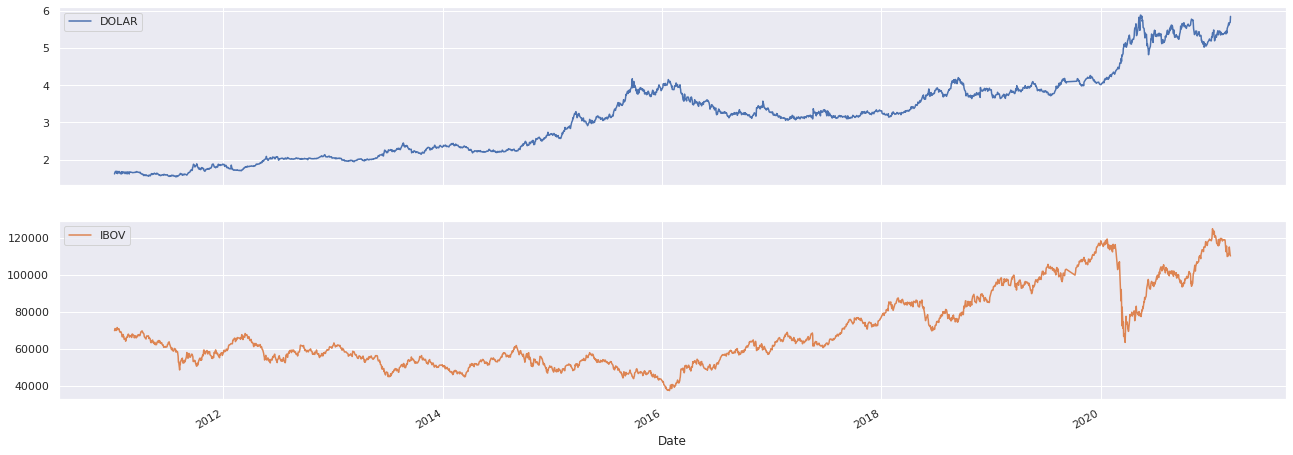

In [67]:
# Faz a plotagem dos Gráficos

sns.set()
carteira.plot(subplots=True, figsize=(22,8)); # Aqui foi utilizado a opção subplots

## Parte 4 - Análises dos dados e plotagens

In [ ]:
retornos = carteira.pct_change()[1:]
retornos

In [ ]:
retornos.describe()

In [ ]:
# Gráfico de correlação comparando os retornos
sns.heatmap(retornos.corr(), annot=True);

In [ ]:
# Gráfico da correlação do IBOV e Dollar

retornos["DOLAR"].rolling(252).corr(retornos["IBOV"]).plot(figsize=(22,8));

In [ ]:
# Cria coluna do IBOV Dolarizado
carteira["IBOV_DOLARIZADO"] = (carteira["IBOV"] / carteira["DOLAR"])
carteira

In [ ]:
# Conjunto de Gráficos para análise dos retornos
sns.pairplot(retornos);